In [61]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [62]:
colors = ['#082040', '#175073', '#3285A6', '#B8D0D9', '#6CC5D9']
New_data3 = pd.read_csv(r'C:\Users\Igorr\Documents\ITMO5grade\Algorithm_BigData\Without_HOMO_LUMO.csv')
display(New_data3)

,A,B,mu,alpha,r2,zpve,u0,cv,ABC,nAcid,...,fr_para_hydroxylation,fr_phenol,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_tetrazole,fr_urea,gap,smiles_code
0,3.18840,0.81811,5.2689,76.23,1536.2250,0.087848,-415.556589,29.286,7.099577,0,...,0,0,0,0,0,0,0,0,0.1980,16167.0
1,2.49891,1.84690,1.7357,80.46,1025.3787,0.184554,-387.077518,31.170,7.662296,0,...,0,0,0,0,0,0,0,0,0.3333,7368.0
2,2.35684,1.74283,2.5701,65.19,1101.7221,0.149467,-422.068714,34.081,6.990188,0,...,0,0,0,0,0,0,0,0,0.2132,12528.0
3,4.94611,0.59499,6.0816,79.07,1953.8524,0.146162,-435.260337,35.231,8.242641,0,...,0,0,0,0,0,0,0,0,0.2477,13103.0
4,2.55281,1.23863,1.5674,83.69,1232.9278,0.131554,-384.590827,35.750,7.232561,0,...,0,0,0,0,0,0,0,0,0.2612,12623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,2.43733,1.98372,3.8731,66.31,926.3863,0.137621,-459.015765,28.503,7.099577,0,...,0,0,0,0,0,0,0,0,0.2748,5886.0
19979,4.87456,0.91933,2.7583,73.64,1316.1081,0.122828,-437.854622,29.819,5.794754,0,...,0,0,0,0,0,0,0,0,0.1969,16419.0
19980,4.51150,0.80861,2.5281,69.87,1465.7955,0.116722,-362.642739,31.269,6.542301,0,...,0,0,0,0,0,0,0,0,0.2863,3795.0
19981,2.67771,1.95271,2.7901,66.61,968.9898,0.118482,-396.011151,29.039,6.459522,0,...,0,0,0,0,0,0,0,0,0.2356,2601.0


Normalization

At this step, we normalize our data using the functions that took place at the lecture

In [63]:
New_data3_descriptors = pd.DataFrame()
New_data3_target = pd.DataFrame()
New_data3_tardet = New_data3['gap']
New_data3_descriptors = New_data3.drop(columns = ['gap','smiles_code'], axis=0)

In [64]:
# Предположим, что df уже определен как ваш датасет

# Нормализация данных
scaler = MinMaxScaler(feature_range=(-1, 1))

# Нормализация всего датасета
scaled_data = scaler.fit_transform(New_data3_descriptors)

# Преобразование массива обратно в DataFrame
New_data3_normalized = pd.DataFrame(scaled_data, columns=New_data3_descriptors.columns)

# Вывод результатов
print("Нормализованный датасет:")
New_data3_normalized



Нормализованный датасет:


,A,B,mu,alpha,r2,zpve,u0,cv,ABC,nAcid,...,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_tetrazole,fr_urea
0,-0.960215,-0.979089,-0.372642,0.186937,-0.011307,-0.444073,-0.281174,0.131087,0.613079,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-0.968818,-0.932577,-0.793333,0.266329,-0.350855,0.310505,-0.173305,0.223705,0.740933,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-0.970591,-0.937282,-0.693983,-0.020270,-0.300111,0.036728,-0.305840,0.366812,0.588225,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-0.938282,-0.989176,-0.275875,0.240240,0.266281,0.010940,-0.355805,0.423346,0.872792,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-0.968146,-0.960077,-0.813373,0.326952,-0.212902,-0.103044,-0.163886,0.448861,0.643294,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,-0.969587,-0.926392,-0.538837,0.000751,-0.416653,-0.055704,-0.445783,0.092594,0.613079,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
19979,-0.939175,-0.974513,-0.671574,0.138326,-0.157614,-0.171131,-0.365632,0.157289,0.316613,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
19980,-0.943705,-0.979518,-0.698984,0.067568,-0.058120,-0.218775,-0.080754,0.228572,0.486461,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
19981,-0.966587,-0.927794,-0.667788,0.006381,-0.388336,-0.205042,-0.207142,0.118944,0.467653,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


PCA

In [65]:
# Применение метода главных компонент (PCA) для снижения размерности
# Создадим объект PCA
pca = PCA()

# Обучим PCA на данных
pca.fit(New_data3_normalized)

# Получим explained variance ratio для каждой компоненты
explained_variance_ratio = pca.explained_variance_ratio_

# Вычислим кумулятивную explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Найдем количество компонент, которые объясняют, например, 95% дисперсии
n_components = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1

print(f"Оптимальное количество компонент для объяснения 95% дисперсии: {n_components}")

Оптимальное количество компонент для объяснения 95% дисперсии: 83


In [66]:
pca = PCA(n_components=83)

transformed_data = pca.fit_transform(New_data3_normalized)

print(transformed_data)

[[ 1.46938814 -0.66855391  1.07641143 ...  0.08504792 -0.05952532
  -0.20225896]
 [-0.90538555 -0.02137903  0.98216467 ...  0.05640084 -0.02178626
   0.02740397]
 [-1.06768588  0.51392835  0.61690237 ...  0.02774164 -0.04537047
  -0.1102763 ]
 ...
 [ 1.22428207  1.26566242 -0.0985946  ...  0.03304133 -0.10988017
   0.0148178 ]
 [-0.10558386  1.5270414   0.13438137 ... -0.02728     0.0376053
   0.03222634]
 [-0.05658816 -0.24438721 -1.44326962 ... -0.07125297  0.16299365
  -0.07498805]]


In [67]:
transformed_df = pd.DataFrame(transformed_data)
transformed_df['gap'] = New_data3_tardet
transformed_df

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,gap
0,1.469388,-0.668554,1.076411,-0.142122,-1.721328,0.204872,0.124540,-0.928616,0.916921,0.139081,...,0.007040,0.043112,-0.129871,-0.156226,0.290855,-0.278131,0.085048,-0.059525,-0.202259,0.1980
1,-0.905386,-0.021379,0.982165,1.020709,0.464272,0.373376,-0.292111,-0.070220,0.382104,-0.420432,...,-0.160479,-0.030928,0.024482,-0.091469,0.108443,0.079146,0.056401,-0.021786,0.027404,0.3333
2,-1.067686,0.513928,0.616902,-0.118424,-0.976714,0.667737,-0.895176,0.769657,-1.125191,0.030964,...,0.101590,-0.189906,0.028406,-0.045021,-0.059086,0.088836,0.027742,-0.045370,-0.110276,0.2132
3,-0.900136,-0.533876,1.415162,-0.157348,-0.894643,0.253984,-0.488668,-0.696794,0.546881,0.292916,...,-0.017635,-0.067444,0.002548,0.100610,0.109330,0.087192,-0.142953,-0.035025,-0.005796,0.2477
4,-0.298237,0.331832,-0.451508,-0.977601,-0.094022,-0.127383,0.587089,0.279389,0.463904,0.614646,...,0.069204,0.095433,0.080770,0.009517,-0.092604,-0.063371,-0.009425,-0.112160,-0.044089,0.2612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,0.509840,-1.402572,0.743862,0.024143,-1.463671,0.939472,-0.102187,-1.104805,0.737460,-0.278304,...,0.252600,0.063326,-0.044326,-0.205857,0.125969,0.015095,-0.038669,0.087262,-0.151045,0.2748
19979,0.559429,0.031505,0.328474,0.369231,1.253546,-0.481275,-0.314377,0.463929,0.798011,0.769388,...,0.215970,-0.025356,-0.176429,-0.056611,-0.028676,-0.142015,0.185174,-0.056623,0.060753,0.1969
19980,1.224282,1.265662,-0.098595,0.048718,-0.540497,1.188516,0.473691,-0.332607,-0.224182,0.338531,...,-0.171555,0.076081,-0.085171,-0.121739,0.135503,-0.274326,0.033041,-0.109880,0.014818,0.2863
19981,-0.105584,1.527041,0.134381,-1.356124,-0.784500,-0.702794,0.354776,0.173158,0.666997,-0.152018,...,-0.019007,0.027799,0.223270,-0.038207,0.008267,-0.001095,-0.027280,0.037605,0.032226,0.2356


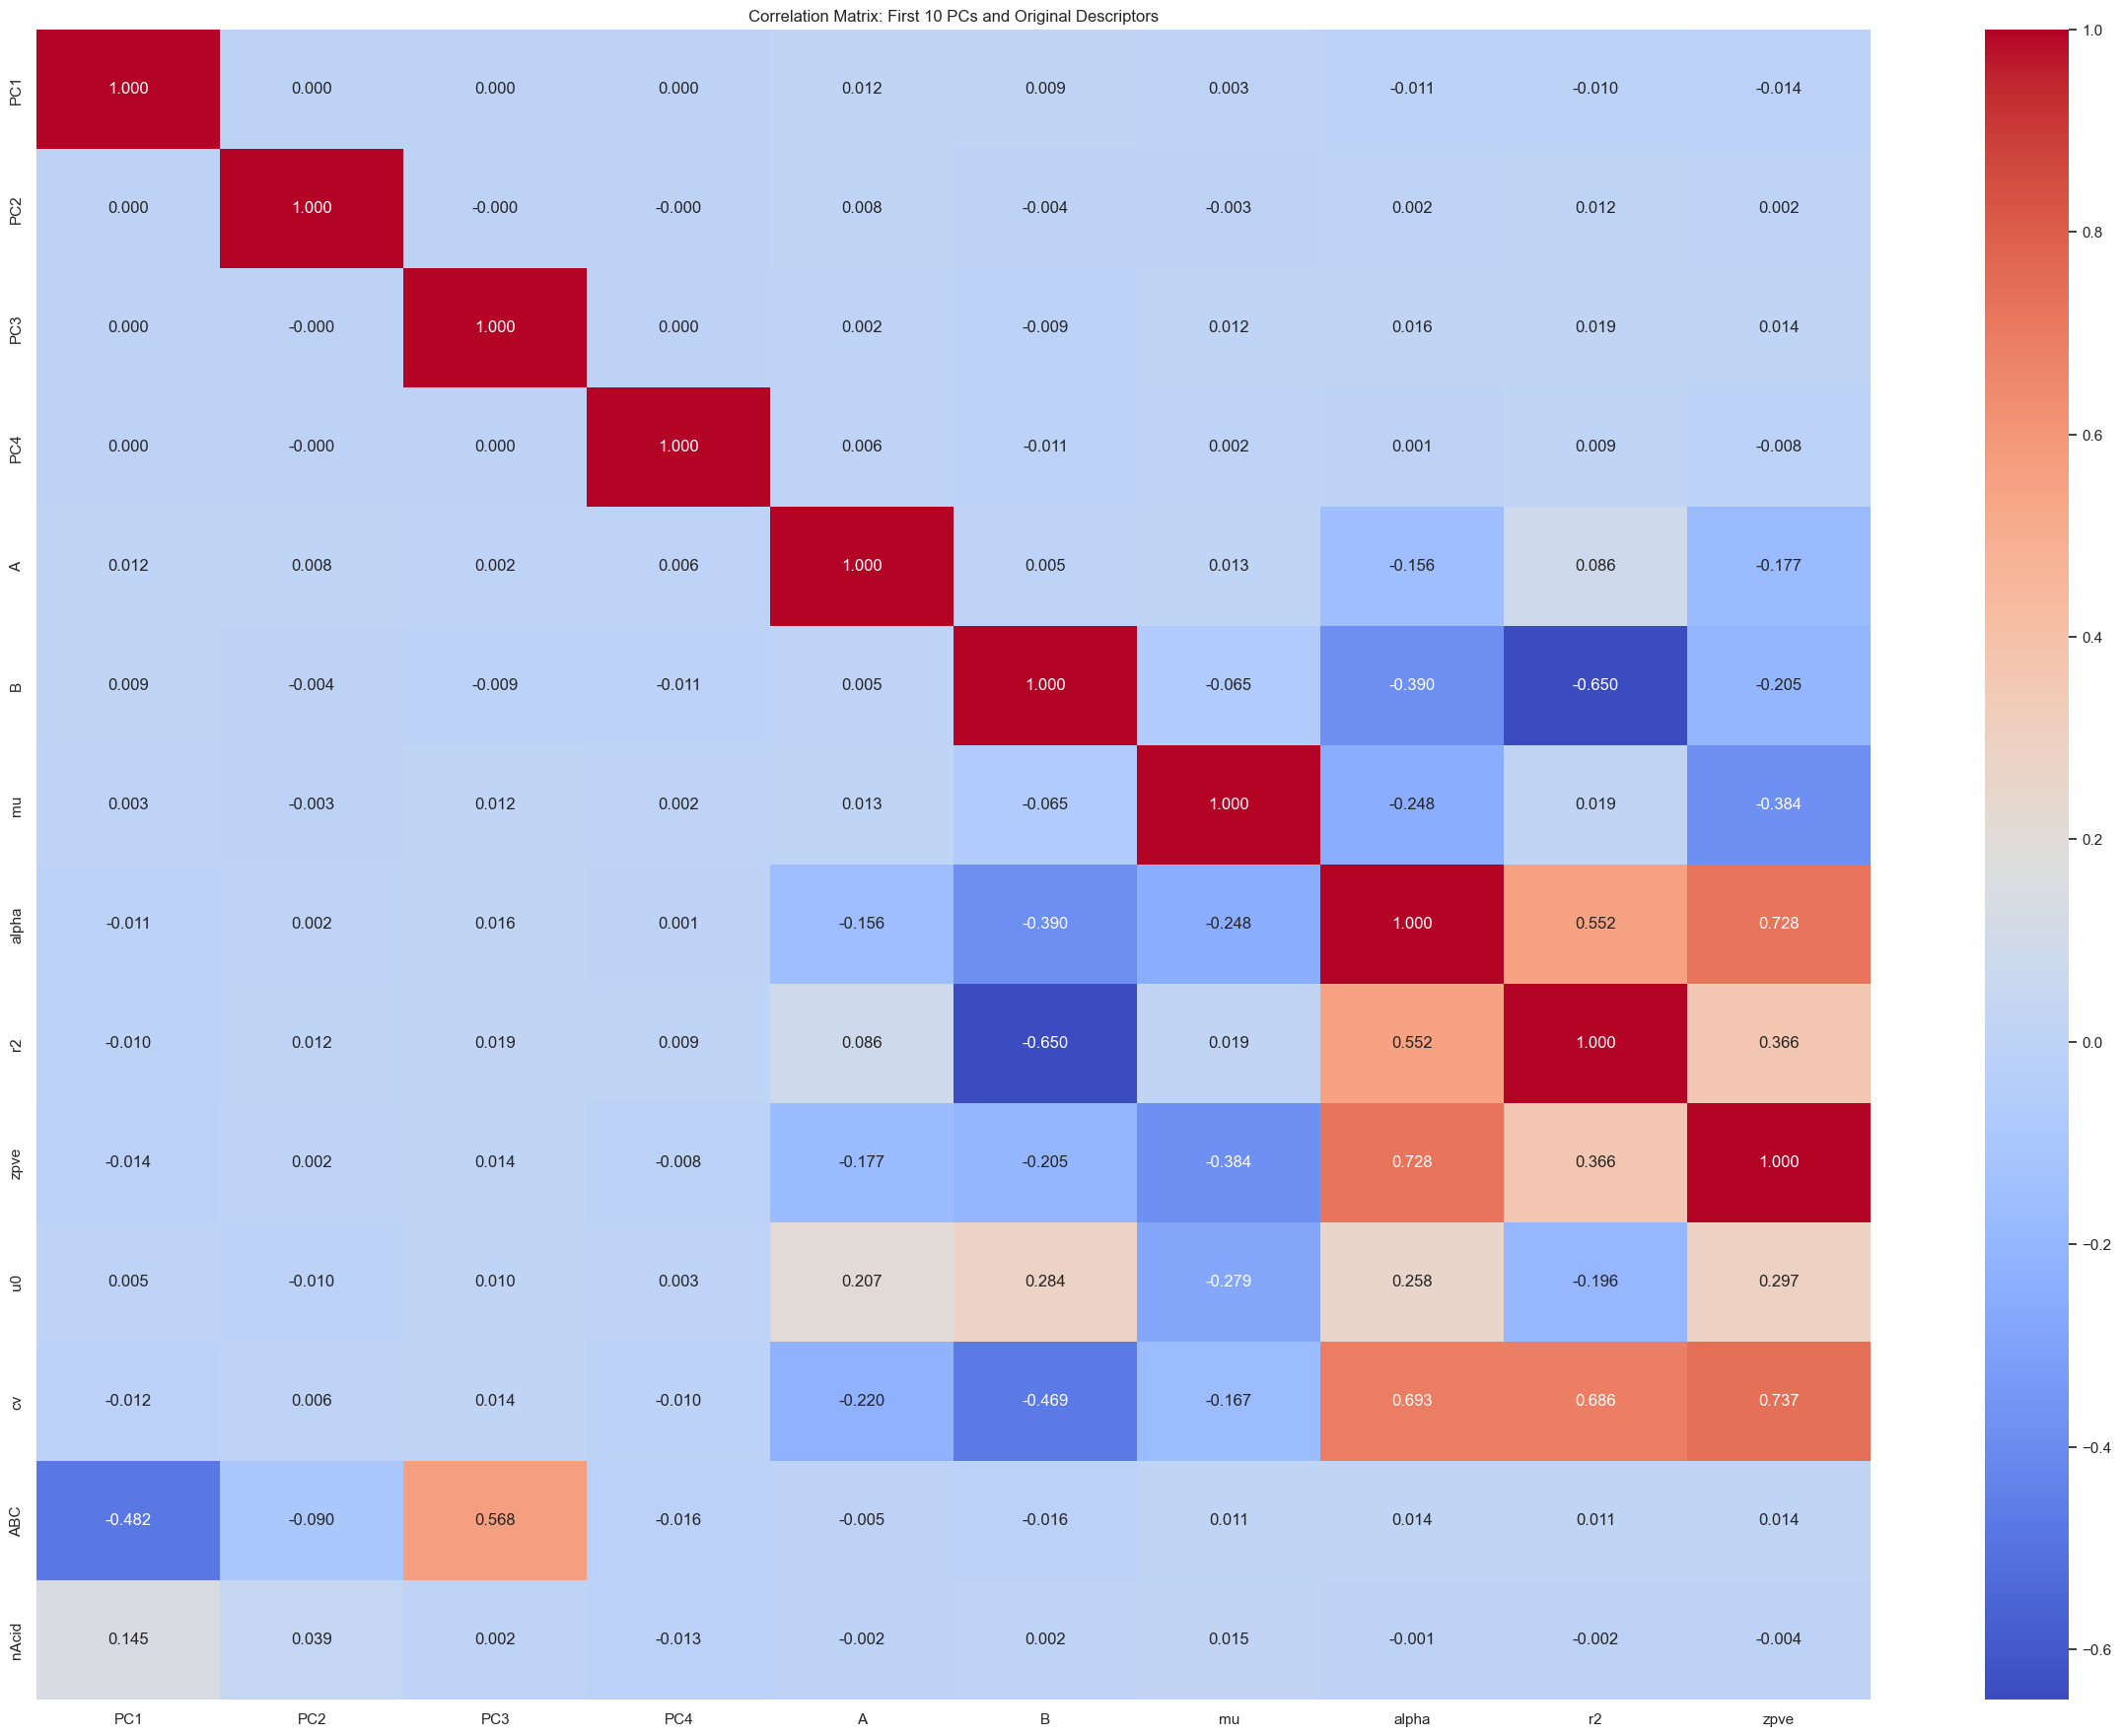

In [68]:

# Шаг 2: Создание DataFrame с PCA компонентами
df_pc = pd.DataFrame(data=transformed_data, columns=[f'PC{i}' for i in range(1, 84)])  # Имена компонент: PC1, PC2 и т.д.

# Шаг 3: Объединение PCA компонент с исходными дескрипторами
# df - это оригинальный DataFrame, содержащий исходные дескрипторы, кроме 'smiles' и 'gap'
df_col = pd.concat(
    [
        df_pc[['PC1', 'PC2', 'PC3','PC4']],  # Берем первые три компоненты PCA
        New_data3_normalized
    ],
    axis=1
)

# Шаг 4: Вычисление корреляционной матрицы
corMatrix = df_col.corr()

# Шаг 5: Выбор подмножества данных (первые 10 компонент PCA и первые 14 исходных дескрипторов)
corMatrix_subset = corMatrix.iloc[:14, :10]

# Шаг 6: Визуализация корреляционной матрицы
sns.set(rc={'figure.figsize': (30, 22)})
sns.heatmap(corMatrix_subset, annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Correlation Matrix: First 10 PCs and Original Descriptors')
plt.show()


In [31]:
# sns.pairplot(transformed_df)
# plt.show()

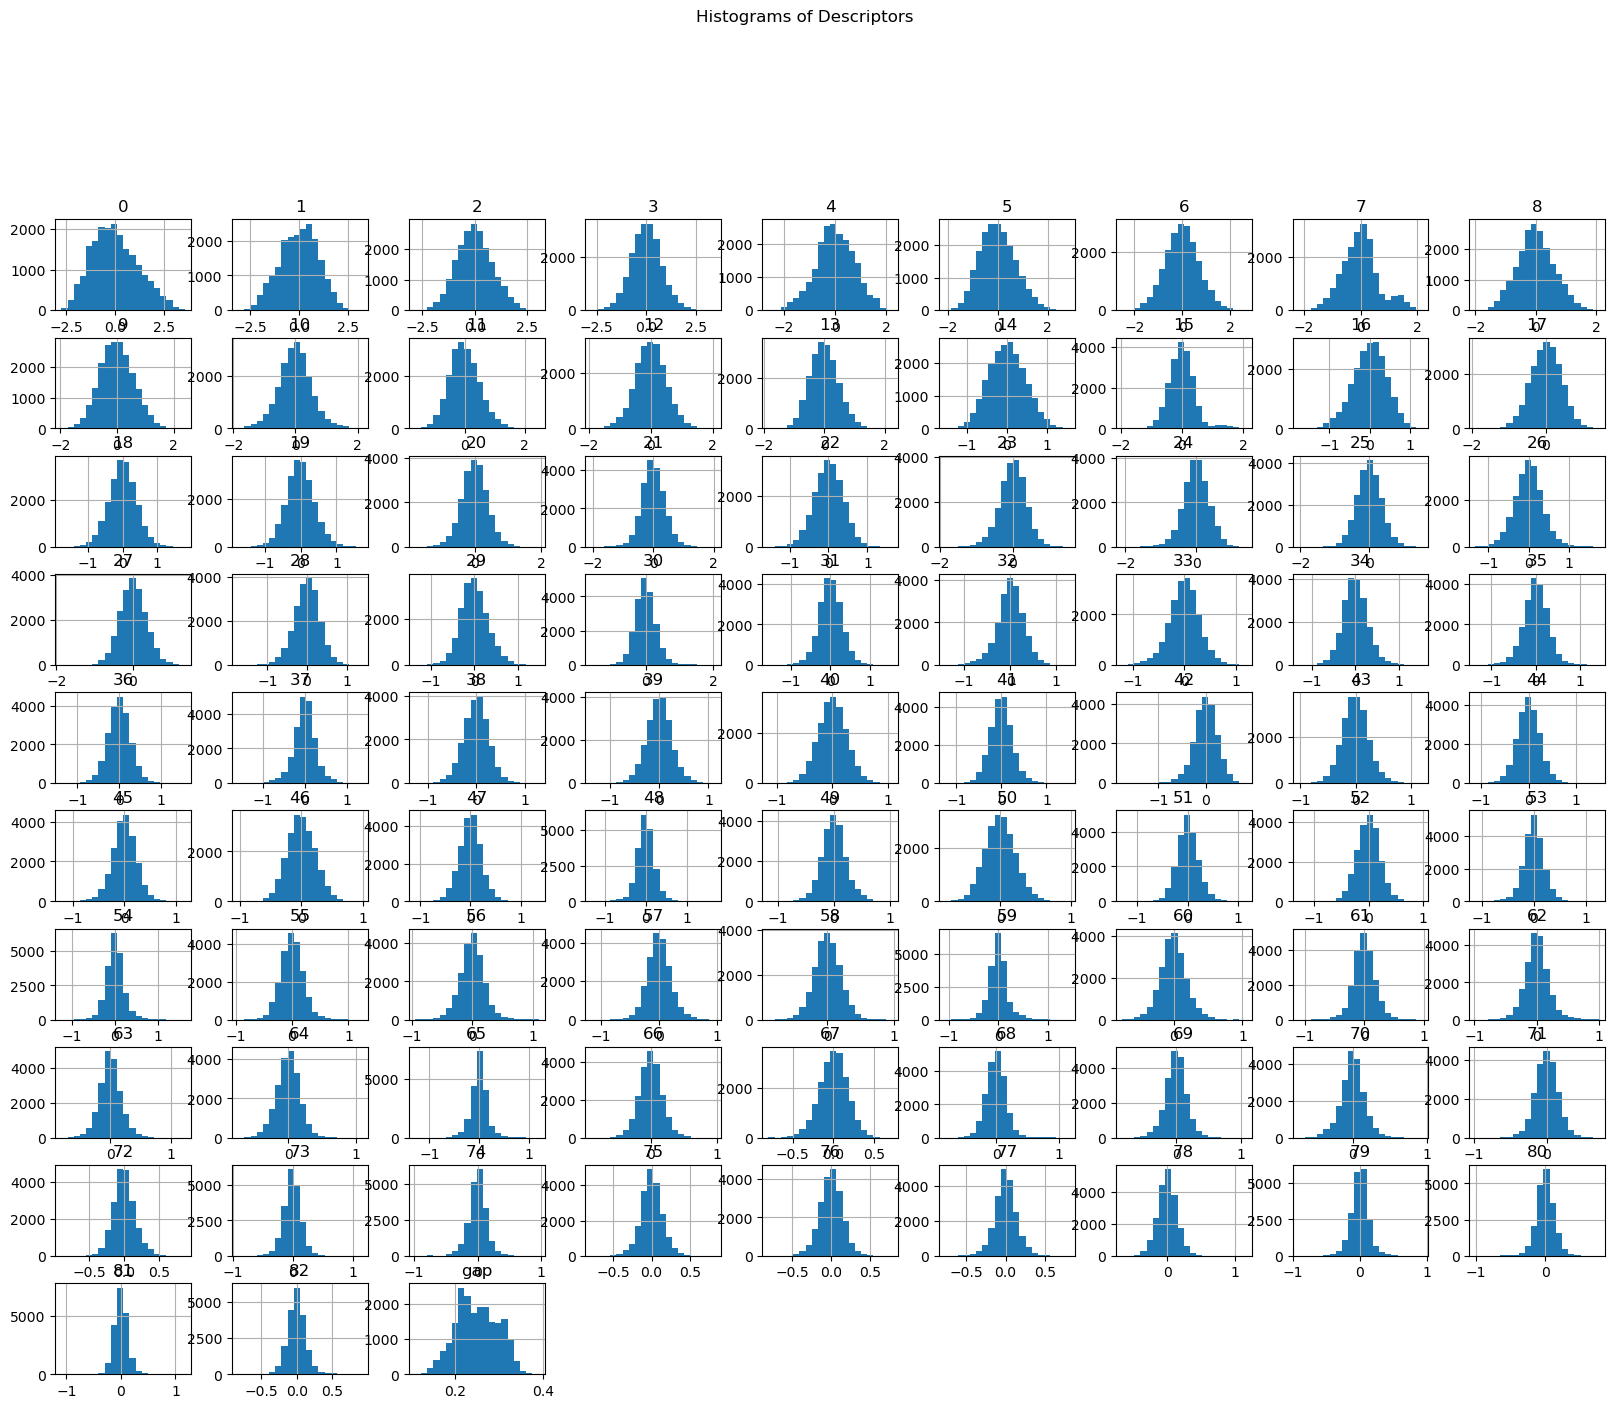

In [46]:
# sns.pairplot(transformed_df.iloc[:,range(5)], size=3.0)
# Построение гистограмм для каждого дескриптора
transformed_df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Descriptors', x=0.5, y=1.02)
plt.show()






In [53]:
df_pca = pd.concat([New_data3_normalized, transformed_df], axis=1)
df_pca

,A,B,mu,alpha,r2,zpve,u0,cv,ABC,nAcid,...,74,75,76,77,78,79,80,81,82,gap
0,-0.960215,-0.979089,-0.372642,0.186937,-0.011307,-0.444073,-0.281174,0.131087,0.613079,-1.0,...,0.007040,0.043112,-0.129871,-0.156226,0.290855,-0.278131,0.085048,-0.059525,-0.202259,0.1980
1,-0.968818,-0.932577,-0.793333,0.266329,-0.350855,0.310505,-0.173305,0.223705,0.740933,-1.0,...,-0.160479,-0.030928,0.024482,-0.091469,0.108443,0.079146,0.056401,-0.021786,0.027404,0.3333
2,-0.970591,-0.937282,-0.693983,-0.020270,-0.300111,0.036728,-0.305840,0.366812,0.588225,-1.0,...,0.101590,-0.189906,0.028406,-0.045021,-0.059086,0.088836,0.027742,-0.045370,-0.110276,0.2132
3,-0.938282,-0.989176,-0.275875,0.240240,0.266281,0.010940,-0.355805,0.423346,0.872792,-1.0,...,-0.017635,-0.067444,0.002548,0.100610,0.109330,0.087192,-0.142953,-0.035025,-0.005796,0.2477
4,-0.968146,-0.960077,-0.813373,0.326952,-0.212902,-0.103044,-0.163886,0.448861,0.643294,-1.0,...,0.069204,0.095433,0.080770,0.009517,-0.092604,-0.063371,-0.009425,-0.112160,-0.044089,0.2612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,-0.969587,-0.926392,-0.538837,0.000751,-0.416653,-0.055704,-0.445783,0.092594,0.613079,-1.0,...,0.252600,0.063326,-0.044326,-0.205857,0.125969,0.015095,-0.038669,0.087262,-0.151045,0.2748
19979,-0.939175,-0.974513,-0.671574,0.138326,-0.157614,-0.171131,-0.365632,0.157289,0.316613,-1.0,...,0.215970,-0.025356,-0.176429,-0.056611,-0.028676,-0.142015,0.185174,-0.056623,0.060753,0.1969
19980,-0.943705,-0.979518,-0.698984,0.067568,-0.058120,-0.218775,-0.080754,0.228572,0.486461,-1.0,...,-0.171555,0.076081,-0.085171,-0.121739,0.135503,-0.274326,0.033041,-0.109880,0.014818,0.2863
19981,-0.966587,-0.927794,-0.667788,0.006381,-0.388336,-0.205042,-0.207142,0.118944,0.467653,-1.0,...,-0.019007,0.027799,0.223270,-0.038207,0.008267,-0.001095,-0.027280,0.037605,0.032226,0.2356


In [94]:
correl = pd.concat([New_data3_normalized, New_data3_tardet], axis=1)

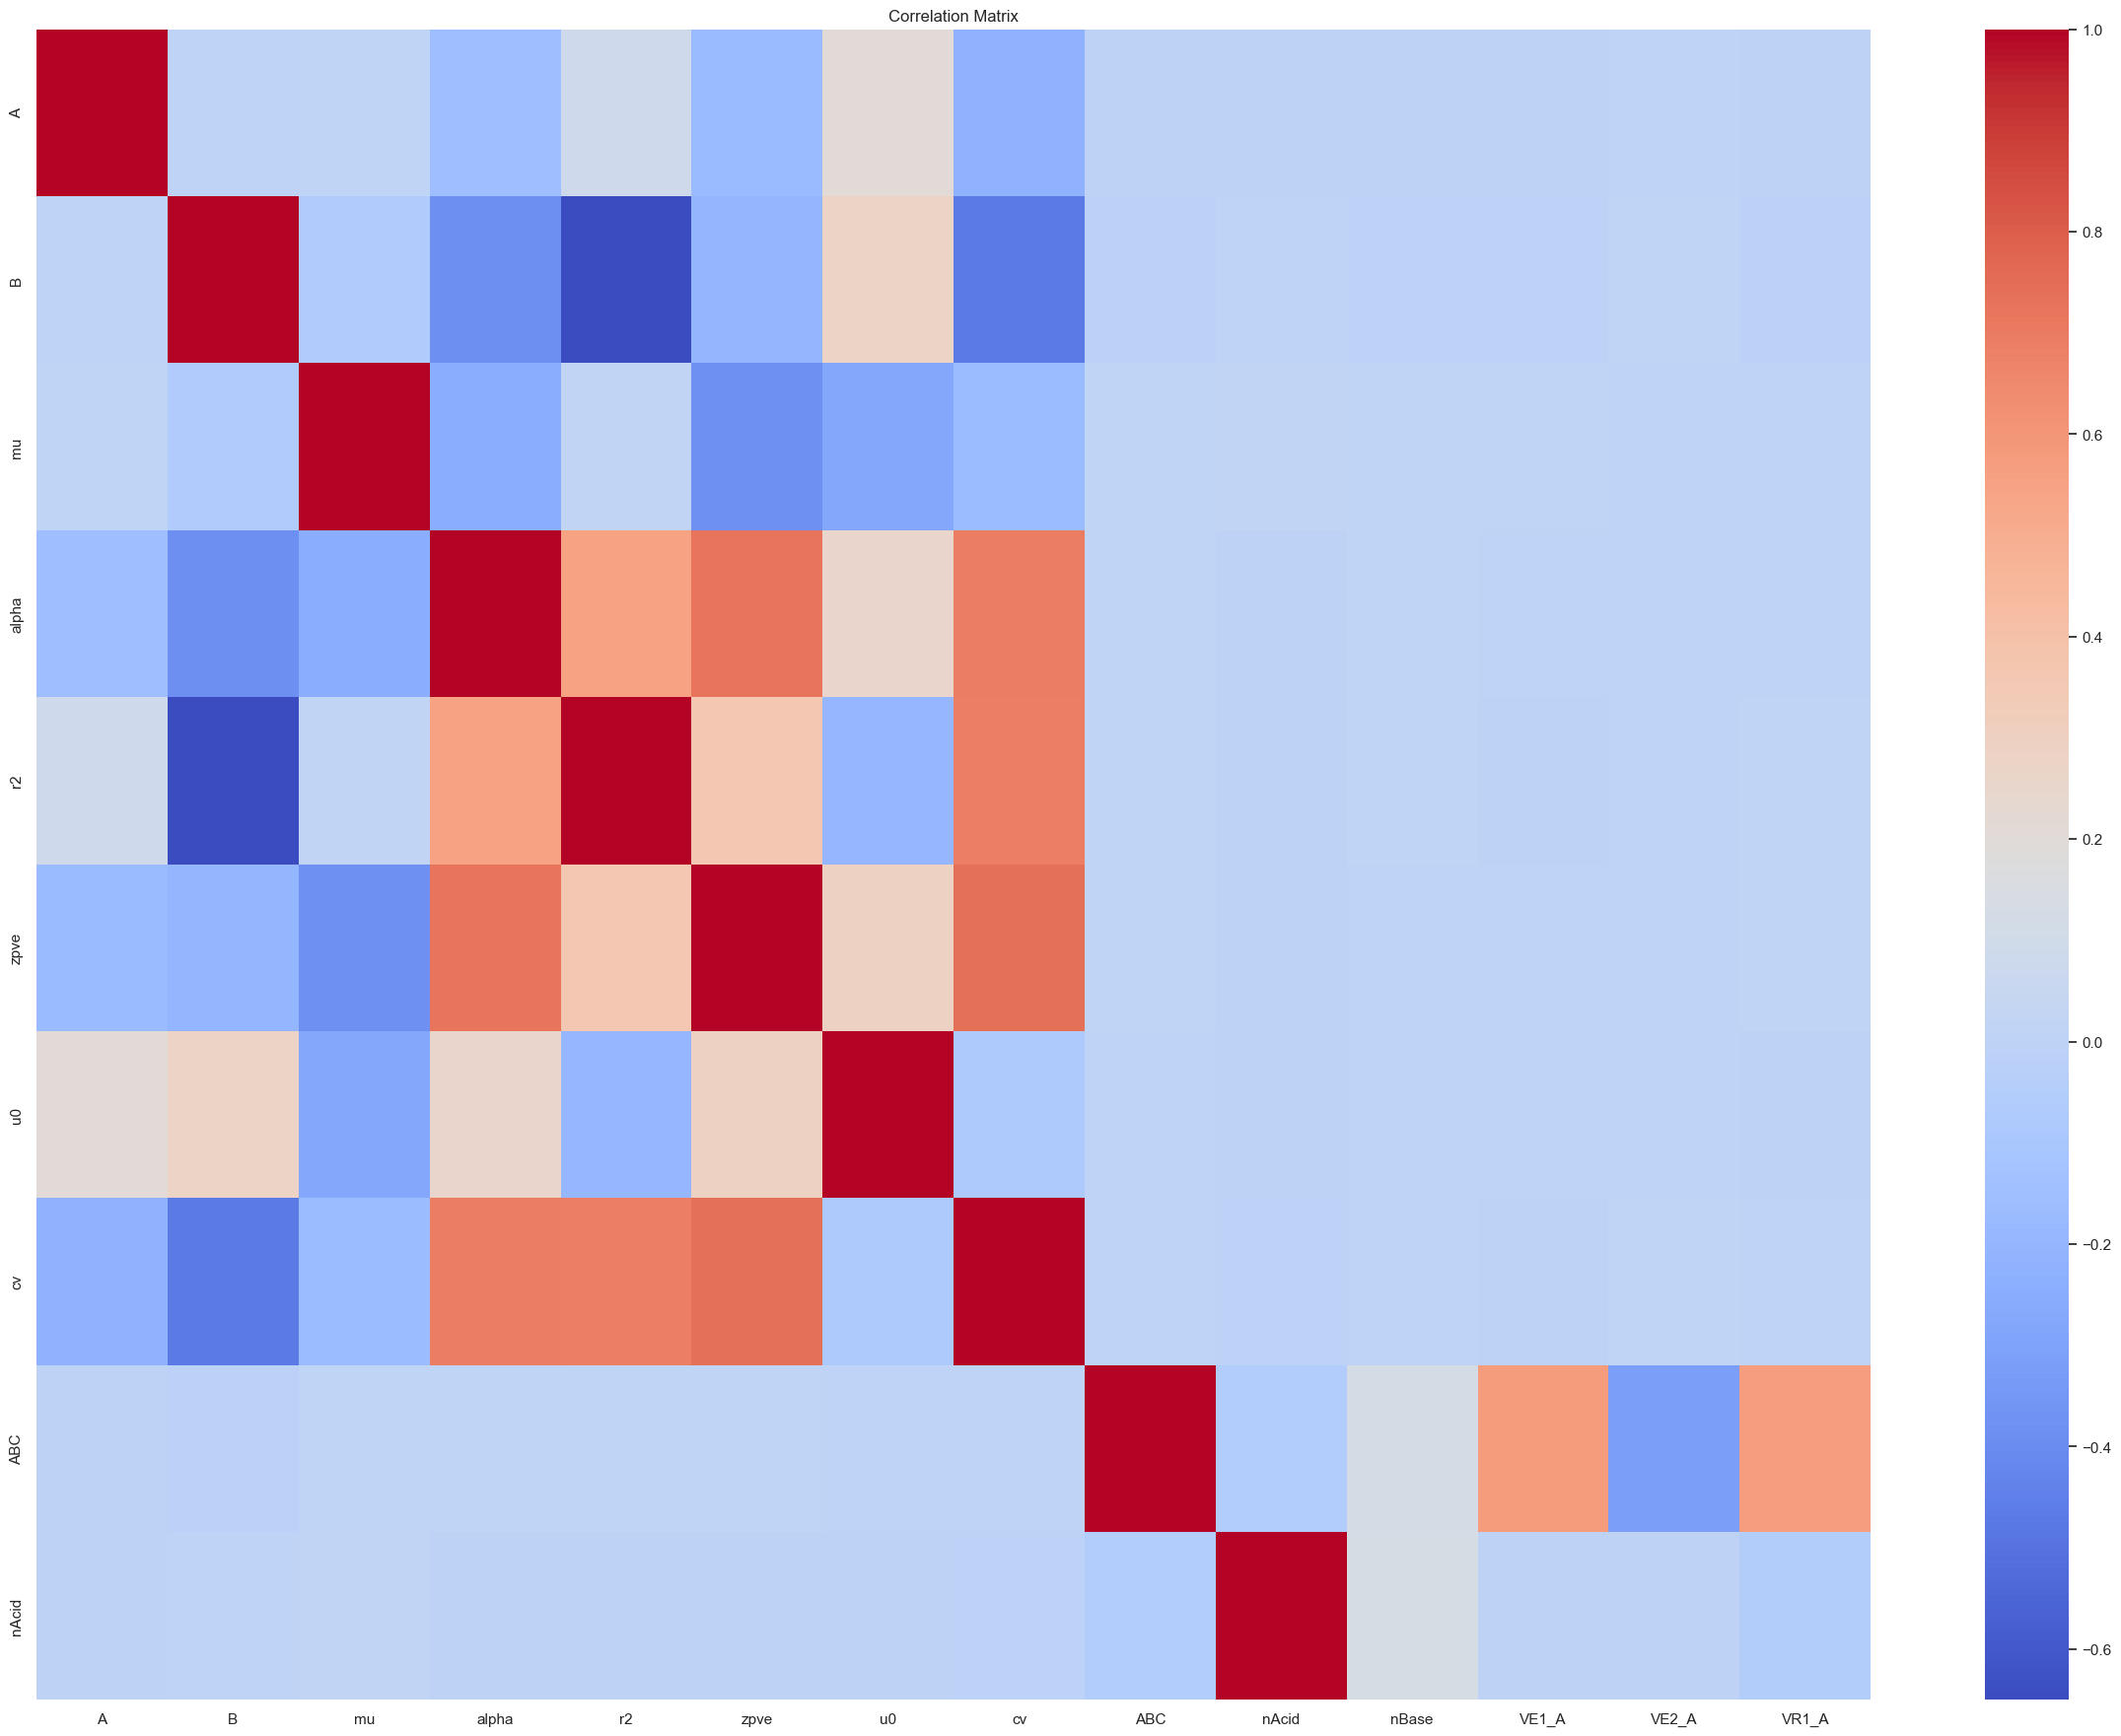

A              -0.025380
B               0.021443
mu             -0.338085
alpha           0.193477
r2              0.057972
                  ...   
fr_priamide     0.000240
fr_pyridine    -0.003035
fr_tetrazole   -0.012704
fr_urea        -0.002042
gap             1.000000
Name: gap, Length: 226, dtype: float64

In [99]:
# Построение матрицы корреляции
correlation_matrix = correl.corr()
corMatrix_subset = correlation_matrix.iloc[:10, :14]
sns.heatmap(corMatrix_subset, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
display(correlation_matrix['gap'])


In [96]:
# Вывод корреляций для nHetero
nHetero_correlation = correlation_matrix.loc['nHetero']
print(nHetero_correlation)

A               0.010272
B               0.005971
mu              0.006904
alpha          -0.007745
r2             -0.003952
                  ...   
fr_priamide     0.153721
fr_pyridine     0.036395
fr_tetrazole    0.118534
fr_urea         0.106866
gap            -0.008395
Name: nHetero, Length: 226, dtype: float64


In [97]:
# Вывод корреляции для nHetero
nHetero_correlation = correlation_matrix.loc['nHetero', 'gap']
print(f"Корреляция nHetero с gap: {nHetero_correlation}")

Корреляция nHetero с gap: -0.008394939551043869


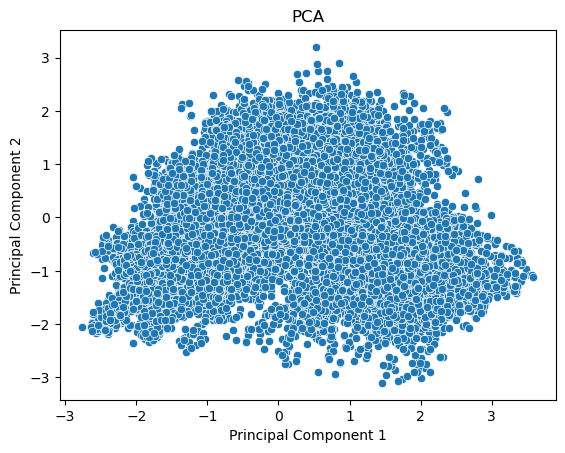

In [48]:

sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1])
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


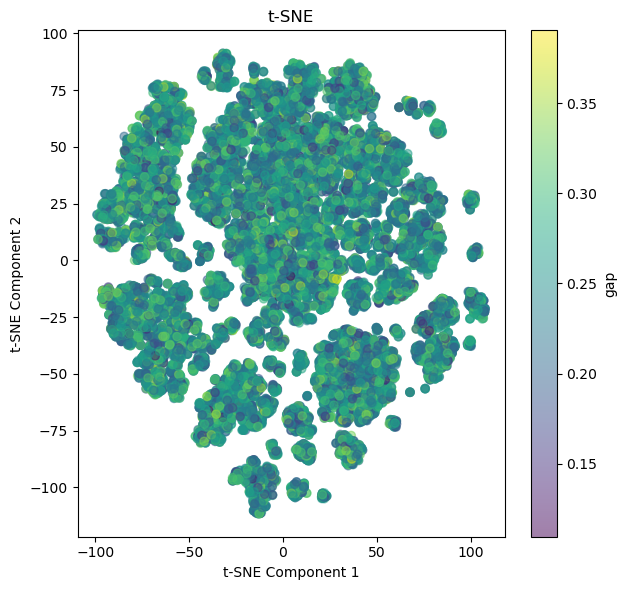

In [49]:

# Получение значения из столбца 'gap' как целевой переменной y
y = transformed_df['gap'].values
X = New_data3_normalized
# Применение t-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

# Создаем новое окно графика
plt.figure(figsize=(12, 6))

# График для t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='gap')

# Показываем графики
plt.tight_layout()
plt.show()

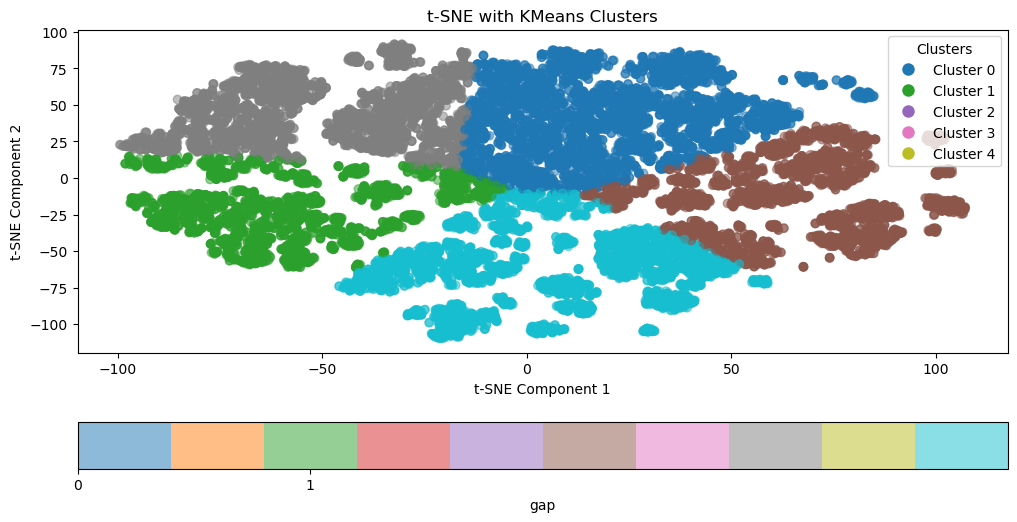

              gap
cluster          
0        0.250695
1        0.252128
2        0.249817
3        0.249699
4        0.251292


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Применение t-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

# Создаем DataFrame для t-SNE результата
tsne_data = pd.DataFrame(tsne_result, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Добавляем целевую переменную 'gap' для анализа
tsne_data['gap'] = y

# Применение KMeans для кластеризации
kmeans = KMeans(n_clusters=5, random_state=0)  # Укажите число кластеров
tsne_data['cluster'] = kmeans.fit_predict(tsne_data[['t-SNE Component 1', 't-SNE Component 2']])

# Создаем окно графика
plt.figure(figsize=(12, 6))

# График t-SNE с кластерами
plt.scatter(tsne_data['t-SNE Component 1'], tsne_data['t-SNE Component 2'], 
            c=tsne_data['cluster'], cmap='tab10', alpha=0.5)
plt.title('t-SNE with KMeans Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Добавляем легенду
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(i / 5), markersize=10) 
           for i in range(5)]
plt.legend(handles, [f'Cluster {i}' for i in range(5)], title='Clusters')

# Показываем график
plt.colorbar(label='gap', ticks=[0, 1], orientation='horizontal')
plt.show()

# Вывод кластерных характеристик
cluster_analysis = tsne_data.groupby('cluster').mean()
print(cluster_analysis)  # Анализ среднего значения gap в кластерах


In [60]:
correlation_matrix = tsne_data.corr()
print(correlation_matrix['gap'])

t-SNE Component 1   -0.010589
t-SNE Component 2   -0.010257
gap                  1.000000
cluster             -0.002171
Name: gap, dtype: float64


In [24]:
print(tsne_result)

[[ 12.51779   -77.75378  ]
 [-36.610165   47.89514  ]
 [-71.19546   -39.883186 ]
 ...
 [ 35.547264   78.9883   ]
 [ 71.46143    32.501198 ]
 [  1.2742046 -16.103798 ]]


In [23]:
print(cluster_analysis)  # Анализ среднего значения gap в кластерах

         t-SNE Component 1  t-SNE Component 2       gap
cluster                                                
0                21.176970          40.531227  0.250695
1               -58.040001         -20.707432  0.252128
2                64.665352         -12.468154  0.249817
3               -50.187679          44.796772  0.249699
4                 4.258405         -61.738323  0.251292


In [81]:
# X - нормализованные дескрипторы, y - целевая переменная gap
z = New_data3_normalized  # Удаляем ненужные колонки #X
f = New_data3_tardet  # Целевая переменная   #y


In [82]:
from sklearn.model_selection import train_test_split

# Разделение данных
z_train, z_test, f_train, f_test = train_test_split(z, f, test_size=0.2, random_state=42)


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Обучение модели
model = LinearRegression()
model.fit(z_train, f_train)

# Предсказание
f_pred = model.predict(z_test)

# Оценка качества модели
mse = mean_squared_error(f_test, f_pred)
r2 = r2_score(f_test, f_pred)
print(f'MSE: {mse:.3f}, R^2: {r2:.3f}')


MSE: 0.001, R^2: 0.496


In [86]:
import pandas as pd

# Вывод коэффициентов
coefficients = pd.DataFrame({'Descriptor': z.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
display(coefficients)


,Descriptor,Coefficient
18,nHetero,1.092430e+10
68,C2SP1,5.441062e+09
92,NtN,5.441062e+09
81,NtCH,2.720531e+09
161,n9AHRing,5.004973e+07
...,...,...
157,n9HRing,-5.004973e+07
65,nBondsT,-7.254750e+09
20,nO,-7.803073e+09
21,nF,-9.363687e+09


In [87]:
# Сортируем коэффициенты по убыванию
top_coefficients = coefficients.sort_values(by='Coefficient', ascending=False).head(10)

# Выводим строки с 10 наибольшими значениями коэффициентов
print(top_coefficients)

    Descriptor   Coefficient
18     nHetero  1.092430e+10
68       C2SP1  5.441062e+09
92         NtN  5.441062e+09
81        NtCH  2.720531e+09
161   n9AHRing  5.004973e+07
160    n9aRing  5.004973e+07
5         zpve  1.631757e-01
180     Kappa3  1.040524e-01
33      ATSC5c  7.386692e-02
32      ATSC4c  5.769983e-02


In [102]:
transformed_df.to_csv(r'C:\Users\Igorr\Documents\ITMO5grade\Algorithm_BigData\transformed_df.csv', index=False)